In [1]:
%load_ext autoreload
%autoreload 2

bike-packing True
49


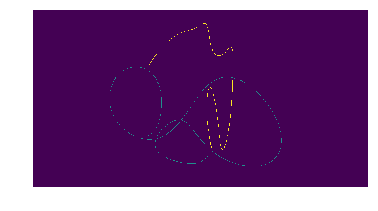

bike-packing False
49


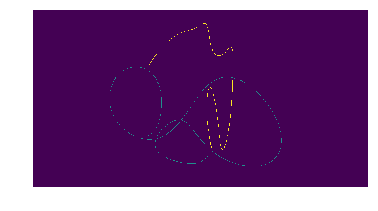

bike-packing False
49


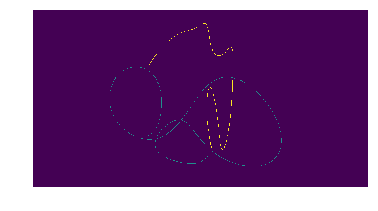

bike-packing True
39


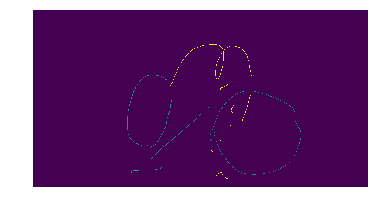

bike-packing False
39


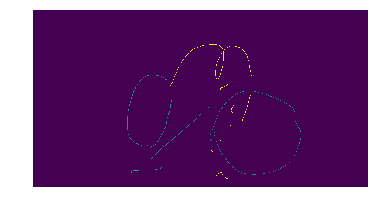

bike-packing False
39


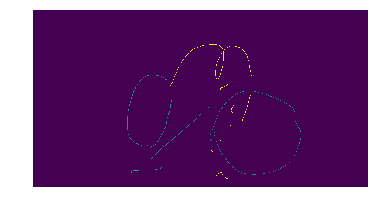

bike-packing True
20


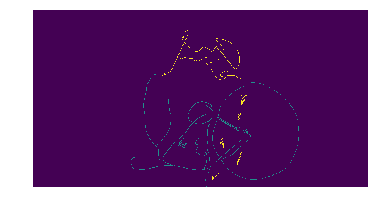

bike-packing False
20


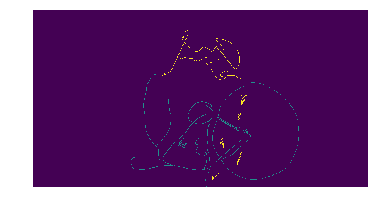

bike-packing False
20


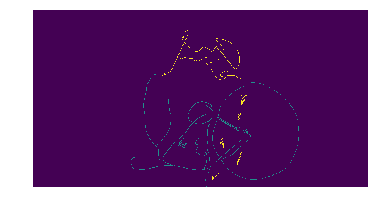

blackswan True
25


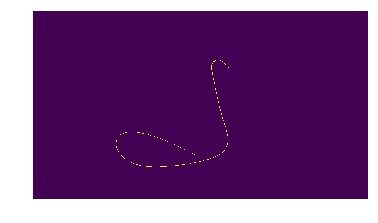

blackswan False
25


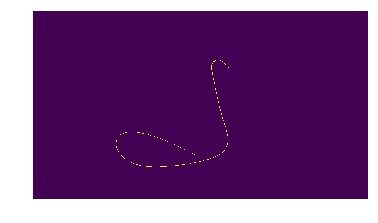

blackswan False
25


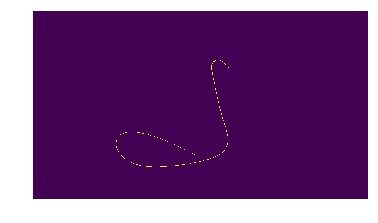

blackswan True
38


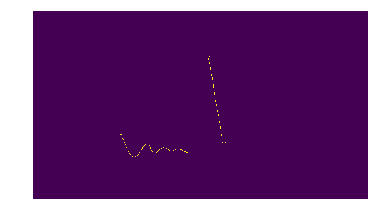

blackswan False
38


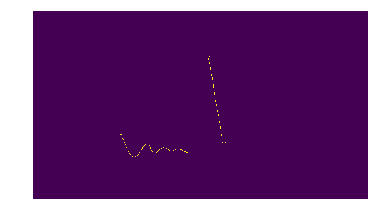

blackswan False
38


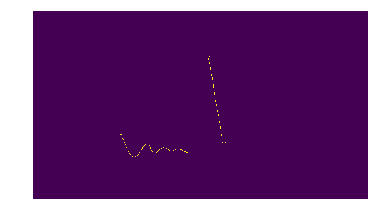

In [2]:
from davisinteractive.client import DavisInteractiveSession
from davisinteractive.dataset import Davis
from davisinteractive.utils.scribbles import scribbles2mask

import matplotlib.pyplot as plt
%matplotlib inline

davis_root = '/Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/'
davis = Davis(davis_root)

def model(sequence, scribbles):
    seq_info = davis.dataset['sequences'][sequence]
    img_size = tuple(seq_info['image_size'][::-1])
    
    masks = scribbles2mask(scribbles, img_size, default_value=0, bezier_curve_sampling=True, bresenham_=True)
    return masks

with DavisInteractiveSession(host='localhost', davis_root=davis_root, 
                             subset='val', max_time=None, max_nb_interactions=3) as sess:
    count = 15
    while sess.is_running() and count:
        sequence, scribbles, new_sequence = sess.get_scribbles(only_last=False)
        print(sequence, new_sequence)
        
        annotated_frame = scribbles['annotated_frame']
        print(annotated_frame)
        masks = model(sequence, scribbles)
        
#         plt.figure(dpi=600)
        plt.imshow(masks[annotated_frame])
        plt.axis('off')
        plt.show()
        
        sess.submit_masks(masks)
        count -= 1
#         break

    df = sess.get_report()

In [3]:
df

,sequence,scribble_idx,interaction,object_id,frame,jaccard,timming
0,bike-packing,1,1,0,0,0.000000,0.310609
1,bike-packing,1,1,1,0,0.000000,0.310609
2,bike-packing,1,1,0,1,0.000000,0.310609
3,bike-packing,1,1,1,1,0.000000,0.310609
4,bike-packing,1,1,0,2,0.000000,0.310609
5,bike-packing,1,1,1,2,0.000000,0.310609
6,bike-packing,1,1,0,3,0.000000,0.310609
7,bike-packing,1,1,1,3,0.000000,0.310609
8,bike-packing,1,1,0,4,0.000000,0.310609
9,bike-packing,1,1,1,4,0.000000,0.310609


In [4]:
df.groupby(['sequence', 'scribble_idx', 'interaction', 'object_id']).mean()

jaccard   timming
sequence     scribble_idx interaction object_id                    
bike-packing 1            1           0          0.000244  0.310609
                                      1          0.000265  0.310609
                          2           0          0.000316  0.409490
                                      1          0.000362  0.409490
                          3           0          0.000385  0.586893
                                      1          0.000472  0.586893
             2            1           0          0.000400  0.430323
                                      1          0.000344  0.430323
                          2           0          0.000472  0.669091
                                      1          0.000442  0.669091
                          3           0          0.000541  0.679180
                                      1          0.000552  0.679180
             3            1           0          0.000802  0.616276
                                      1          0.000555  0.616276
                          2           0          0.000874  0.751381
                                      1          0.000652  0.751381
                          3           0          0.000943  1.023864
                                      1          0.000762  1.023864
blackswan    1            1           0          0.000403  0.251629
                          2           0          0.000586  0.274878
                          3           0          0.000767  0.320681
             2            1           0          0.000286  0.204292
                          2           0          0.000469  0.282148
                          3           0          0.000650  0.344894